<h1>
<center>
Assignment 2: Classification and locally weighted regression
</center>
</h1>
<center>
CS 4262/5262 - Foundations of Machine Learning<br>
Vanderbilt University, Spring 2024<br>
Due: Check Brightspace
</center>
<hr>
<br>This assignment will focus on logistic regression (for binary classification) and locally weighted linear regression. For each algorithm, we have provided a class framework as a suggestion, but you are not required to use those in your implementation. Please use good programming practices - include informative comments and vectorize operations whenever possible. In addition to programming tasks, there are short-answer questions throughout the notebook. 

Contact: Gary Chung kuan-i,chung@vanderbilt.edu for any clarifying questions.

### Please enter your name: Yuanhe Li
### Your class (CS 4262 or CS 5262): CS 4262

In [1]:
import csv
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import scipy as sp
from sklearn import datasets

--- 
## Part 0: Data


You will be applying binary classification to two different datasets: the [Iris](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset) dataset and the wine quality dataset (Data Source :https://archive.ics.uci.edu/ml/datasets/Wine+Quality). The Iris dataset is smaller and simpler, and therefore may be useful for debugging. This dataset consists of measurements (septal and petal length and width) of 50 samples from each of 3 species of Iris flower. The wine quality dataset is more complex, and the classification task is to predict whether a sample should be red wine or white wine given the feature.

**Task 1**
- Load the Iris dataset from scikit-learn. (refer to [link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html))
- Here, we will represent each sample by 2 of the 4 available features: petal width and petal length. 
- Display a scatterplot of the data, such that: 
    * the x- and y- axes correspond to the two features (petal width, petal length)
    * the axes are labelled 
    * points are colored according to class membership
    * the legend describes which iris type (class) is represented by each color

**Question 1:  Which classes appear to be linearly separable in this feature space?**

<font color='blue'>
Response: Class 0 appear to be separable, since they have significantly lower petal width and petal length. They form their own cluster on the plot.

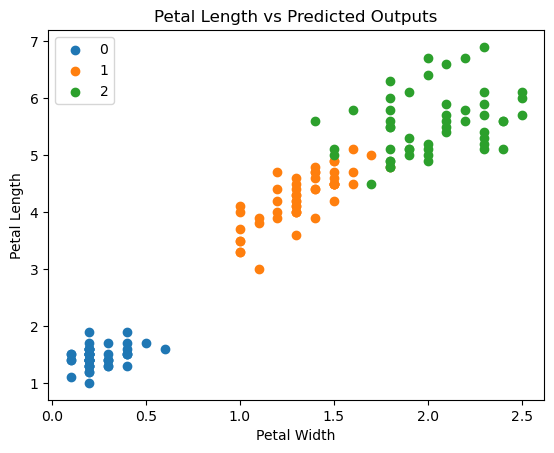

In [2]:
#TODO - Iris dataset
iris = datasets.load_iris()
petal_width = iris.data[:,3]
petal_length = iris.data[:,2]


# Get unique classes
classes = np.unique(iris.target)


for i in classes:
    # Get data of this class
    idx = np.where(iris.target == i)
    
    # put these data into the plot
    plt.scatter(petal_width[idx], petal_length[idx], label=i)

plt.xlabel("Petal Width")
plt.ylabel("Petal Length")
plt.title('Petal Length vs Predicted Outputs')
plt.legend()
plt.show()

**Task 2**
- Load the wine dataset given in the brightspace.
    * we have 1600 lines of white wine data and 1599 lines of red wine data
    * white/red wine is labeled as 0/1
    * each sample has 11 dimensions of features with the same order as [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol] and one dimension of label
- Here, we will represent each sample by 3 features (using mpl_toolkits.mplot3d.Axes3D): 
- Similar to the Iris dataset, display a scatterplot of the data such that: "volatile acidity", "fixed acidity", and "residual sugar".
    * the x-, y-, and z- axes correspond to the features
    * the axes are labelled 
    * the sample point is colored based on the class
    * the legend specifies the label associated with each color

<IPython.core.display.Javascript object>


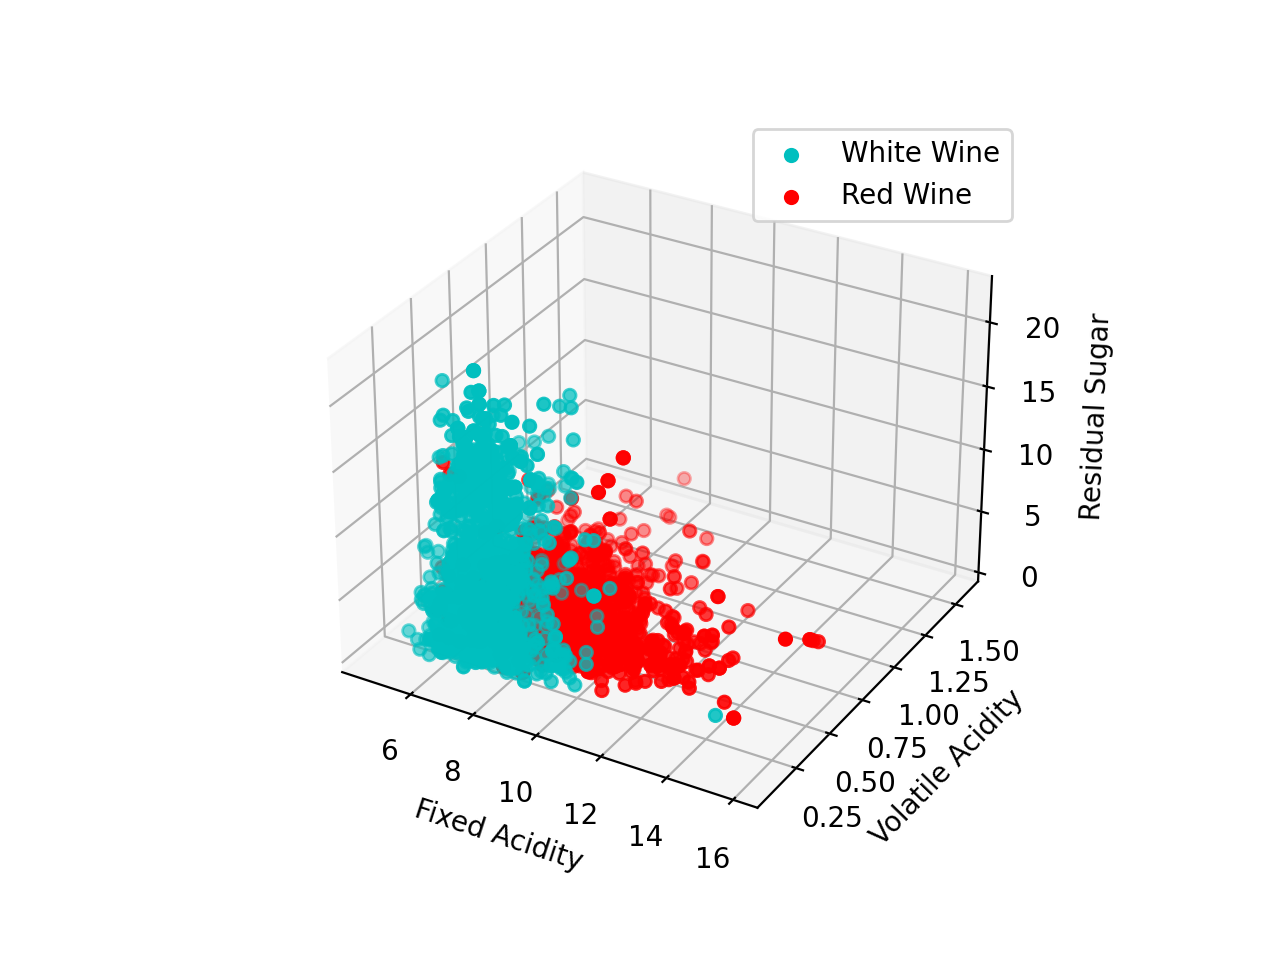

In [3]:
#TODO - wine quality dataset
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
df = pd.read_csv("assignment2-wine_quality.csv")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# if the label is 0.0, it's white wine; 1.0 if it's red wine
white_wine = df[df['label'] == 0.0]
red_wine = df[df['label'] == 1.0]

# Use API to draw a scatterplot
ax.scatter(white_wine['fixed acidity'], white_wine['volatile acidity'], white_wine['residual sugar'], c='c', label='White Wine')
ax.scatter(red_wine['fixed acidity'], red_wine['volatile acidity'], red_wine['residual sugar'], c='r', label='Red Wine')


ax.set_xlabel('Fixed Acidity')
ax.set_ylabel('Volatile Acidity')
ax.set_zlabel('Residual Sugar')

# Legend
ax.legend()

plt.show()



**Task 3**

There are many dimensions of the features, use `sns.PairGrid()` to plot out the pairwise feature relationship on both iris and wine dataset. 

<IPython.core.display.Javascript object>


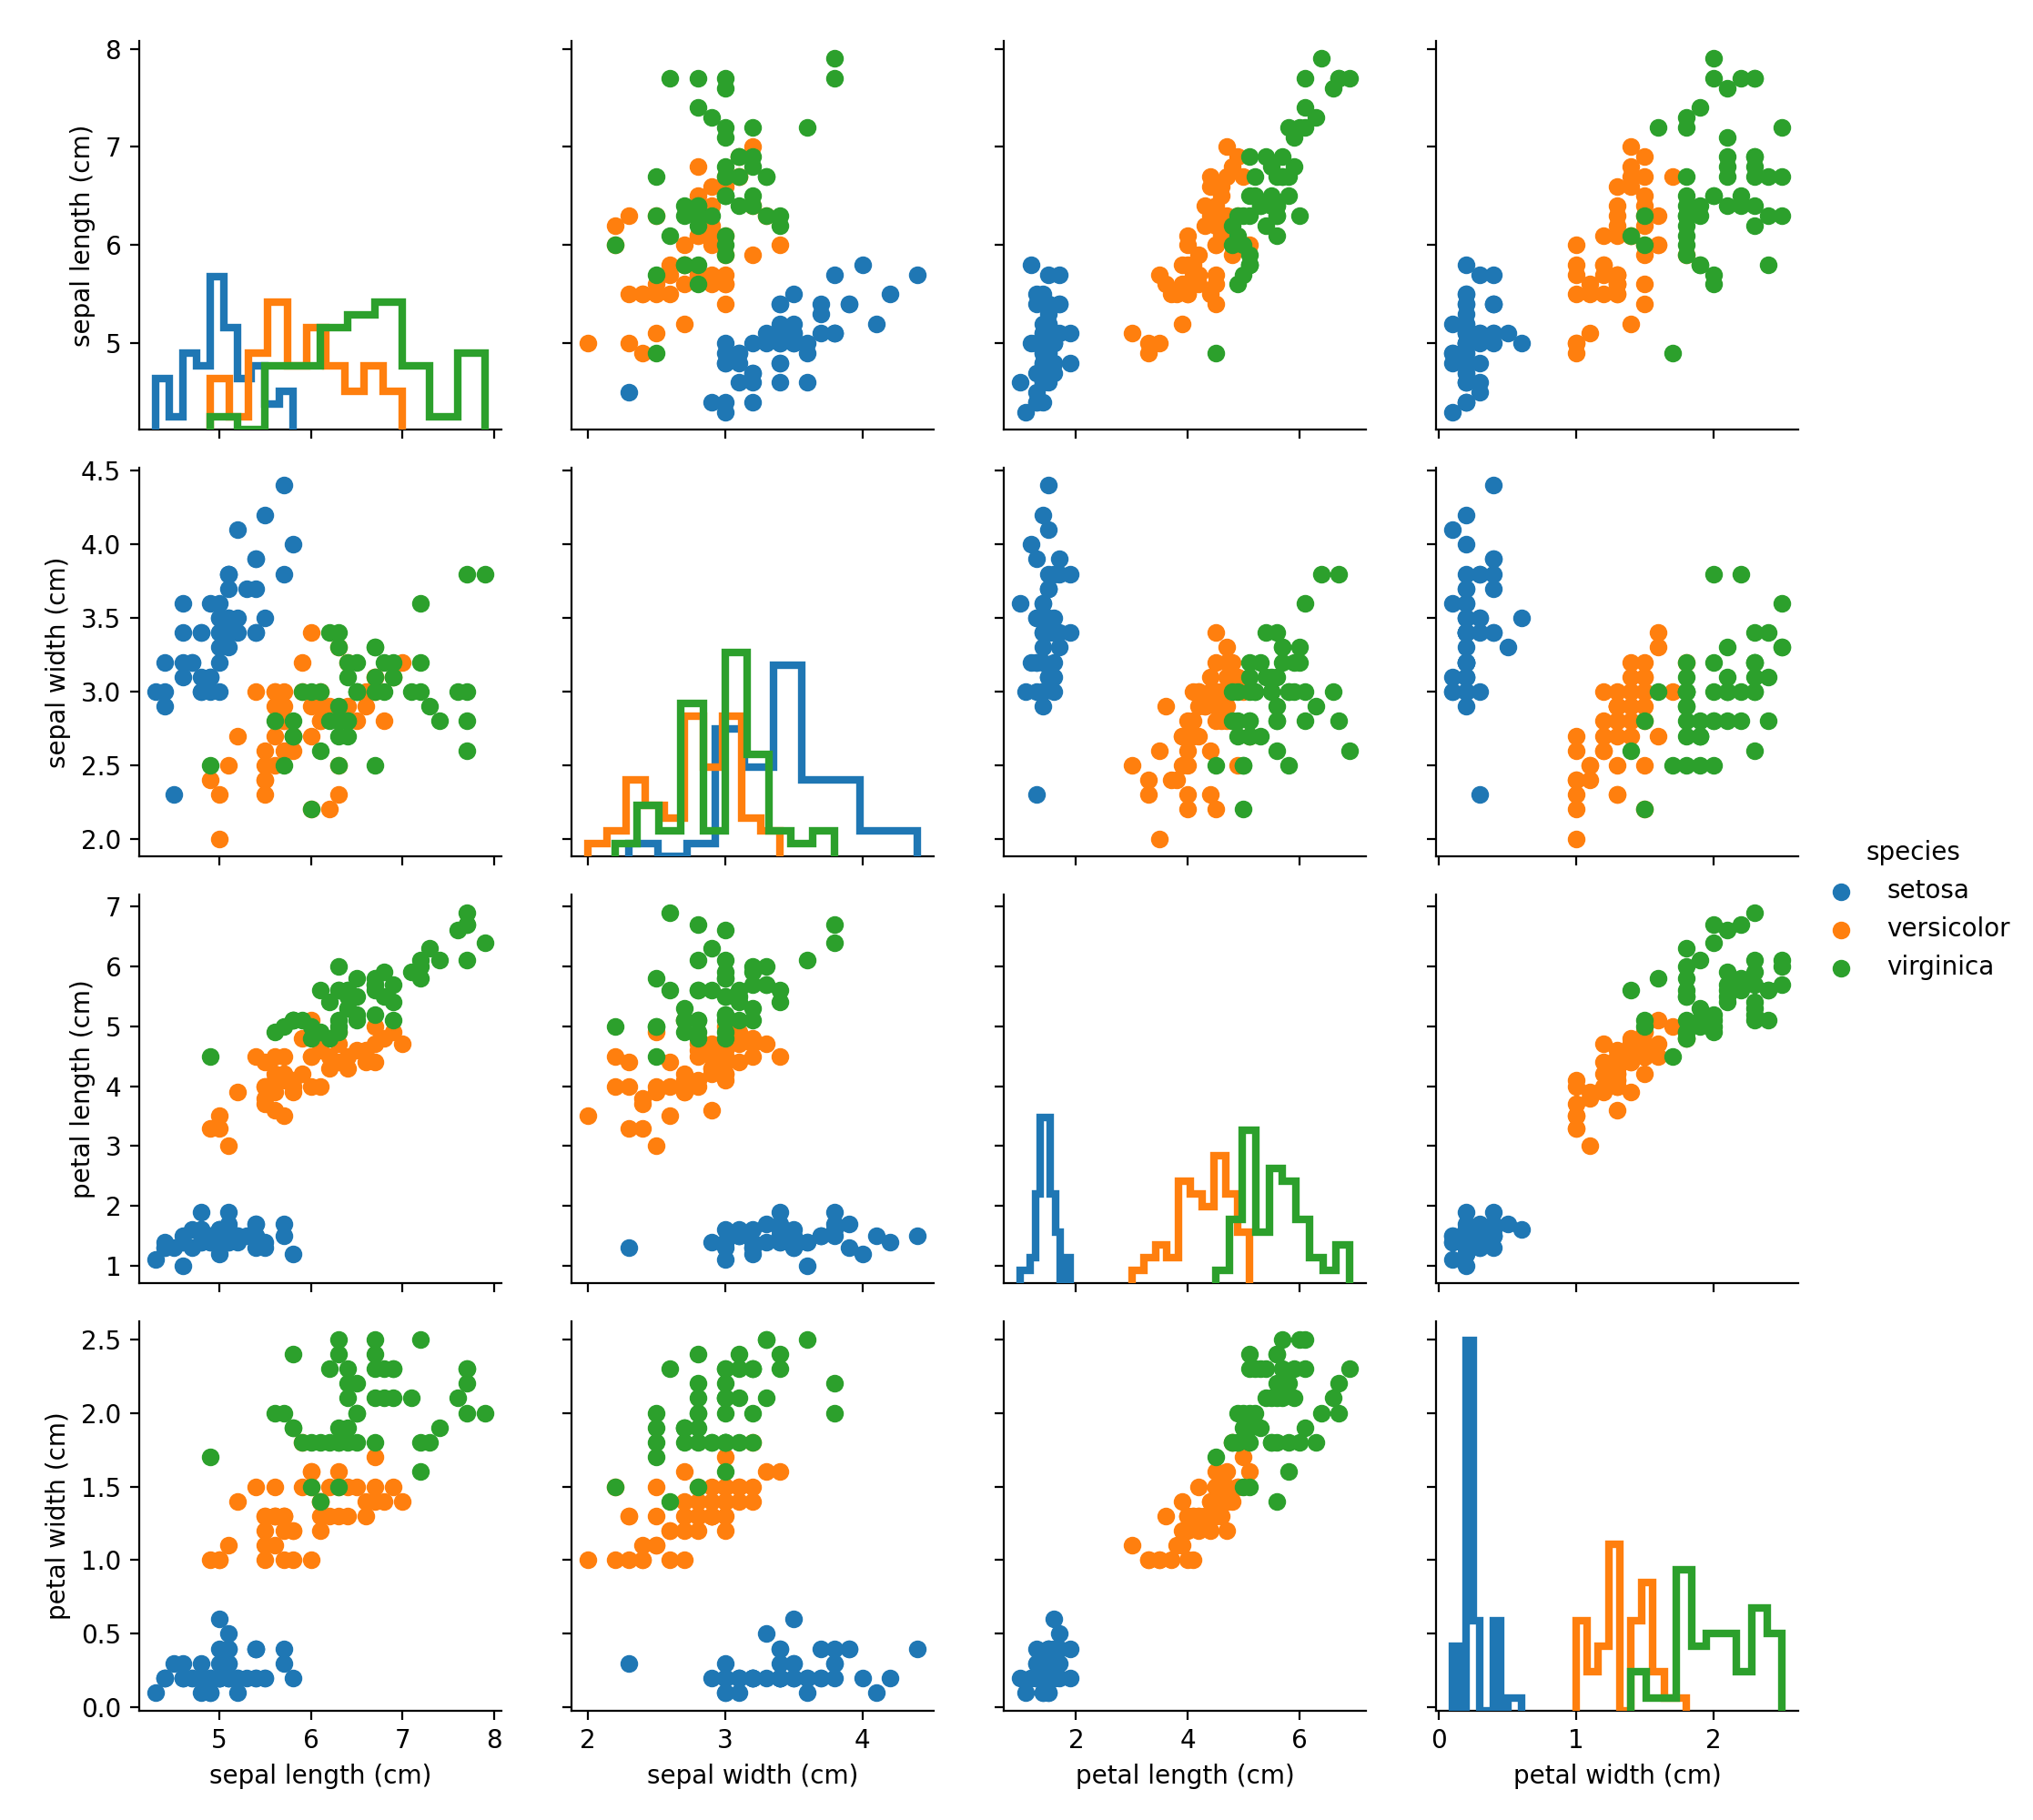

In [4]:
#TODO pairwise plot on 2 dataset
import seaborn as sns

# Iris dataset
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Add the species (target) as a new column
iris_df['species'] = iris.target

# Map the integer species to actual species names for better readability
iris_df['species'] = iris_df['species'].map(dict(enumerate(iris.target_names)))

# Create a PairGrid instance
g = sns.PairGrid(iris_df, hue='species')

# Map the plots to the grid
g = g.map_diag(plt.hist, histtype='step', linewidth=3)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

plt.show()

<IPython.core.display.Javascript object>


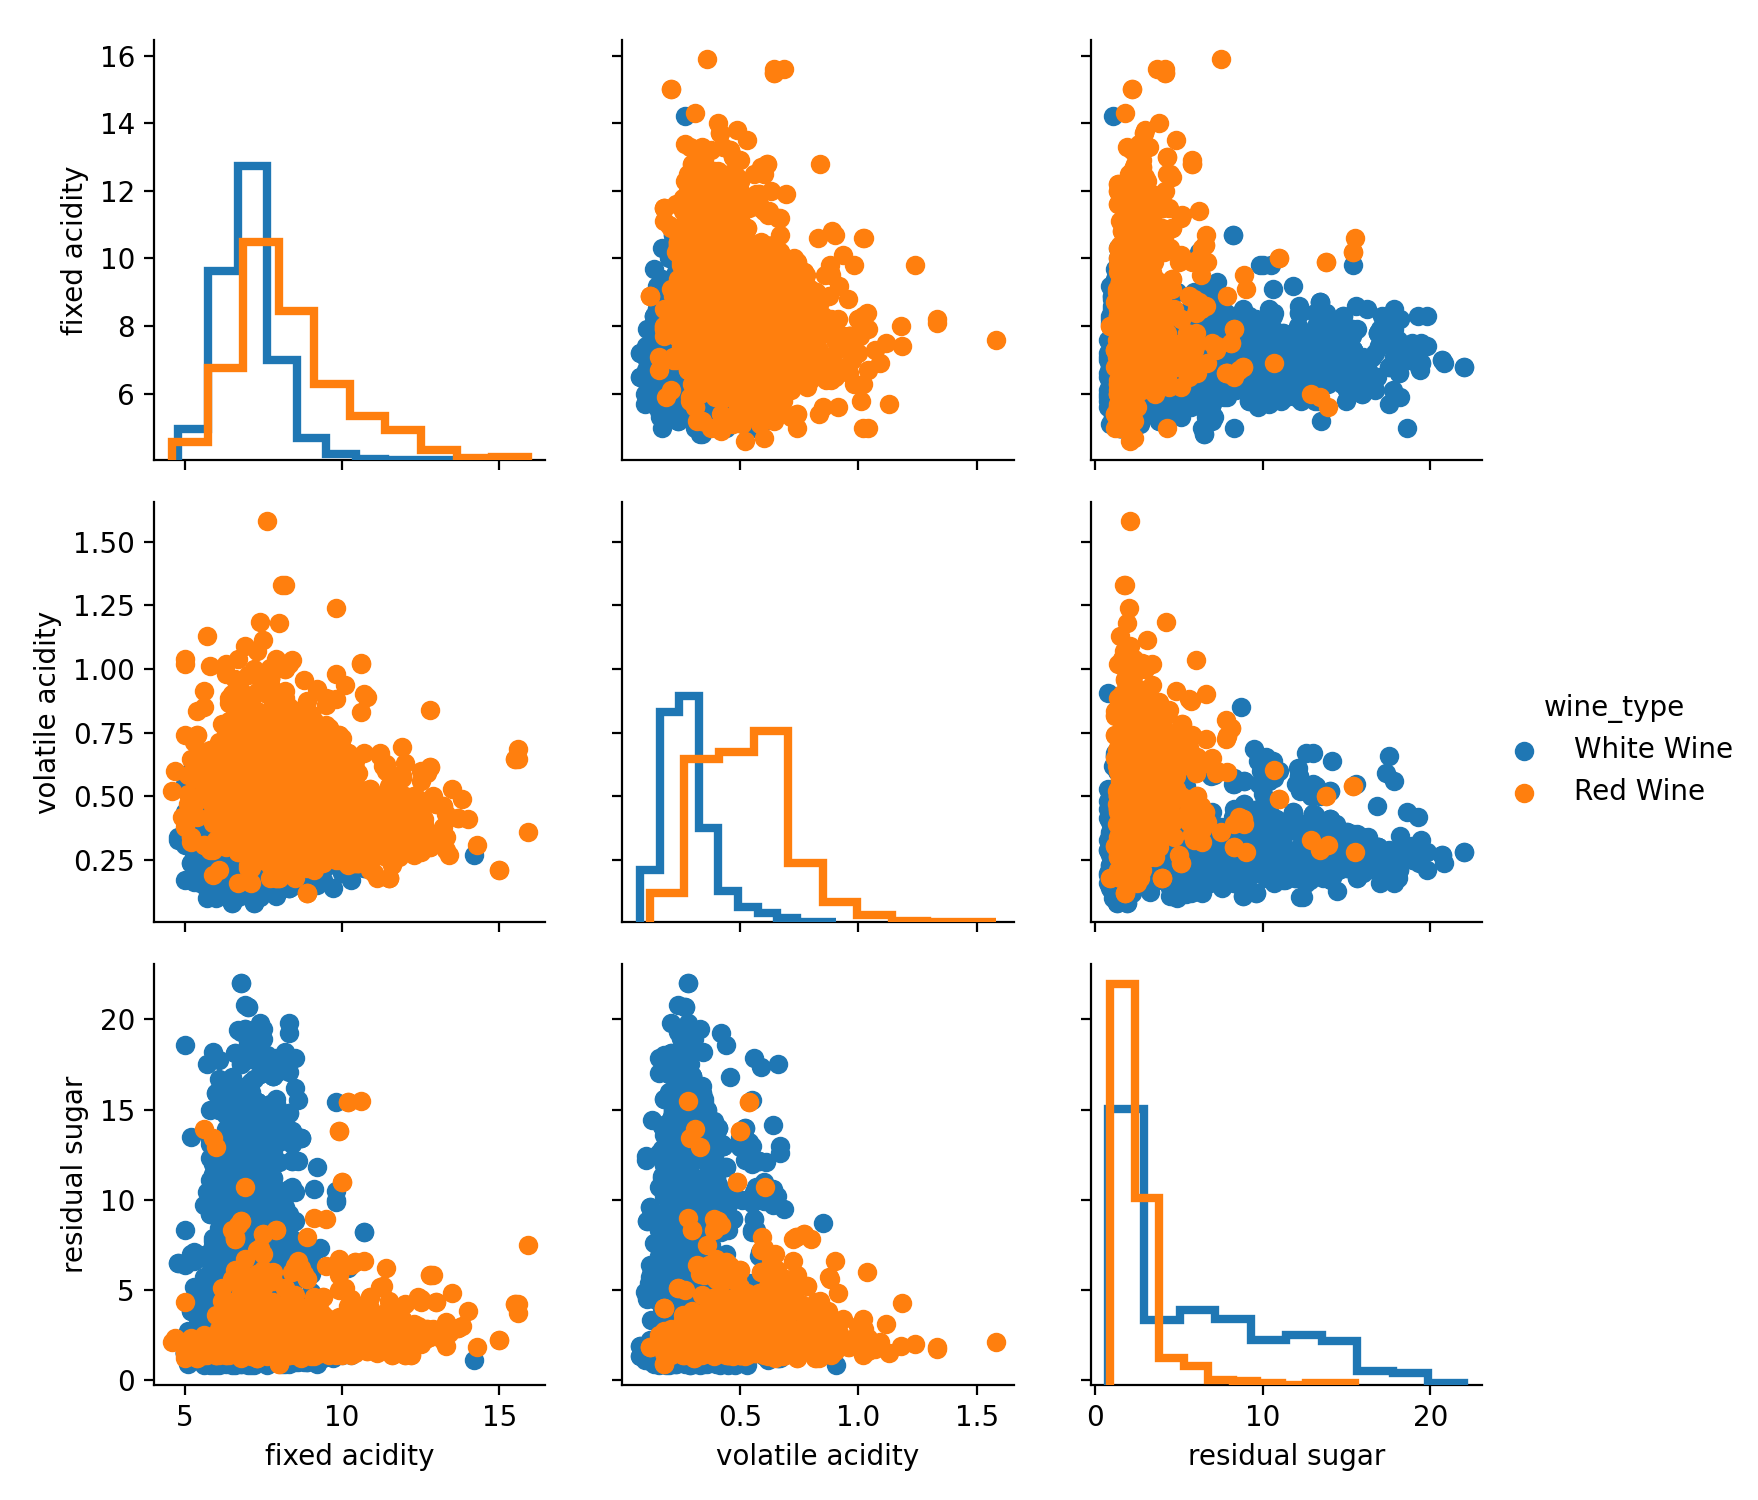

In [5]:
# Assuming the label column is named 'label' where 0.0 represents white wine and 1.0 represents red wine
# Map the numeric labels to string labels for clarity in the plot
df['wine_type'] = df['label'].map({0.0: 'White Wine', 1.0: 'Red Wine'})

# Select only the relevant features for the pairwise plot
selected_features = ['fixed acidity', 'volatile acidity', 'residual sugar', 'wine_type']
wine_df = df[selected_features]

# Create a PairGrid instance with hue for wine type
g = sns.PairGrid(wine_df, hue='wine_type')

# Map the plots to the grid
g = g.map_diag(plt.hist, histtype='step', linewidth=3)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

plt.show()


**Question 2:**

 2.1 Comment on the plots from the wine dataset, compared to the kinds of plots you saw in the Iris dataset. What similarities or differences do you see? What does the PairGrid visualization help to do?

<font color='blue'>
Response: 

**Similarities**: 
1. We're both selecting a number of features to examine in both datasets. Hence, the PairGrid visualization helped to visualize how each pair of variables contribute to the result.
   
2. For both plots we are differentiating class with different colors, so it's easier to disguish.

**Differences**: 
1. The wine dataset has 2 categories, but iris has 3.
2. There's one category in iris that's easily distinguishable, but the class difference in wine dataset is not very apperant.
3. The plot for wine dataset, since we have one more feature, have one more dimension that iris.
    
PairGrid visualization can help us to determine how well each pair of features can help us distinguish between the classes. Also, some dependencies or correlations between variables might be spotted.
</font>

2.2 Discuss separability of the wine dataset, based on what you have seen so far. Is it separable in two features? Do you think multiple features would change this outcome?

<font color='blue'>
Response: The variables are not very distinguishable from each other. Multiple features might change the outcome, because the classes might depend a combinations of many features, and adding additional features can take account to such complexities. Also, some certain features might be highly correlated to the class they belong to, so it is good to include multiple features. However, including too many features could overfit the data.
</font>

---
## Part 1: Logistic Regression

The first classification algorithm you will implement is Logistic Regression (for binary classification). You do not have to use the class framework provided below, but please make sure to organize and comment your code clearly. 

**Task 4**
Write a LogisticRegression class such that:
 - parameters ($\theta$) are optimized using gradient descent 
 - there is an `evaluate` method that returns the model's accuracy on a given set of data
 - there is a `learning curve` method that plots the cost function against the number of iterations
 - there is a `decision boundary` method that renders a plot of the training data with the decision boundary overlayed (note: this code is provided for you below - make sure you understand how it works) 
 - please vectorize operations as much as possible

In [6]:
#TODO - implement LogisticRegression class

class LogisticRegression():
    
    def __init__(self, X, y, theta, alpha):
        self.X = X
        self.y = y
        self.theta = theta 
        self.alpha = alpha
    
    #  h (hypothesis): returns p(y=1|x) on inputs contained in the design matrix X
    def sigmoid(self, X): 
        return 1/(1 + np.exp(-np.dot(X, self.theta)))
    
    # return predictions of class membership (0,1) of the datapoints in an input matrix X
    def predict(self, X):
        return (self.sigmoid(X) >= 0.5).astype(int)
    
    # cost function J()
    def cost(self):
        epsilon = 1e-5  # A small value to prevent log 0
        m = len(self.y)
        h = self.sigmoid(self.X)
        cost = (-1 / m) * np.sum(self.y * np.log(h + epsilon) + 
                                 (1 - self.y) * np.log(1 - h + epsilon))

        return cost
    
    # update theta 
    def gradient_descent_step(self):        
        m = len(self.y)
        diff = self.sigmoid(self.X) - self.y
        gradient = np.dot(self.X.T, diff)
        self.theta -= self.alpha * gradient
        return gradient
    
    # define a convergence criterion 
    # run gradient descent until convergence 
    def run_gradient_descent(self, threshold=0.01):
        losses = []
        loss = self.cost()
        losses.append(loss)
        
        norm_grad_vec = 1
        # < 100000 to stop it before it diverges
        while norm_grad_vec > threshold and norm_grad_vec < 100000:
            grad_vec = self.gradient_descent_step()
            loss = self.cost()
            losses.append(loss)
            norm_grad_vec = np.linalg.norm(grad_vec)
        return losses
    
    # return the model's accuracy on an input (X,y) dataset 
    def evaluate(self, X, y):
        # Return the % that it is correct.
        predictions = self.predict(X)
        correct_predictions = np.sum(predictions == y)
        accuracy = (correct_predictions / len(y))
        return accuracy
    
    # plot cost function over num gradient descent steps
    def learning_curve(self, losses):
        plt.plot(range(len(losses)), losses)
        plt.title('Learning Curve')
        plt.xlabel('Number of Steps')
        plt.ylabel('Loss')
        plt.show()
    
    # plot decision boundary, based on current model parameters
    # you may edit or add cases to this, to accommodate plotting the Iris data too
    def decision_boundary(self, dset, x_text="", y_text=""):
        X = self.X[:,1:]
        theta = [t[0] for t in self.theta]
        y = np.reshape(self.y, (-1))
        xax = [np.min(X[:, 0]), np.max(X[:, 0])]
        yax = -1.0*(theta[0] + np.dot(theta[1], xax)) / theta[2]
        plt.scatter(x=X[y==0,0],y=X[y==0,1],c='red',edgecolor='black')
        plt.scatter(x=X[y==1,0],y=X[y==1,1],c='blue',edgecolor='black')
        plt.plot(xax, yax)
        if dset=='wine':
            plt.legend(['red','white', 'decision boundary'])
            plt.xlabel(x_text)  # name it as the your input x- and y-
            plt.ylabel(y_text)
            plt.title('Wine')
        elif dset=='iris':
            plt.legend(['decision boundary','setosa','versicolor'])
            plt.xlabel('petal width')
            plt.ylabel('petal length')
            plt.title("Iris Dataset")            
        plt.show()
        
    def plot_MSE_loss(self, losses):
        plt.plot(range(len(losses)), losses)
        plt.title('Learning Curve')
        plt.xlabel('Number of Steps')
        plt.ylabel('MSE Loss')
        plt.show()

**Task 5**
Verify that your method works on the Iris dataset. The Iris dataset is originally a 3-class dataset, but for this purpose, please select two of the 3 classes on which to perform binary classification (and again, use the 2 features "petal length" and "petal width"). You do not have to split this dataset further into training and testing sets.
 - Display the decision boundary, superimposed on the scatterplot of the data
 - Add/modify the `decision_boundary` function if needed to accommodate changes in plotting for the Iris dataset.

In [7]:
%matplotlib inline

[[1.  1.4 0.2]
 [1.  1.4 0.2]
 [1.  1.3 0.2]
 [1.  1.5 0.2]
 [1.  1.4 0.2]
 [1.  1.7 0.4]
 [1.  1.4 0.3]
 [1.  1.5 0.2]
 [1.  1.4 0.2]
 [1.  1.5 0.1]
 [1.  1.5 0.2]
 [1.  1.6 0.2]
 [1.  1.4 0.1]
 [1.  1.1 0.1]
 [1.  1.2 0.2]
 [1.  1.5 0.4]
 [1.  1.3 0.4]
 [1.  1.4 0.3]
 [1.  1.7 0.3]
 [1.  1.5 0.3]
 [1.  1.7 0.2]
 [1.  1.5 0.4]
 [1.  1.  0.2]
 [1.  1.7 0.5]
 [1.  1.9 0.2]
 [1.  1.6 0.2]
 [1.  1.6 0.4]
 [1.  1.5 0.2]
 [1.  1.4 0.2]
 [1.  1.6 0.2]
 [1.  1.6 0.2]
 [1.  1.5 0.4]
 [1.  1.5 0.1]
 [1.  1.4 0.2]
 [1.  1.5 0.2]
 [1.  1.2 0.2]
 [1.  1.3 0.2]
 [1.  1.4 0.1]
 [1.  1.3 0.2]
 [1.  1.5 0.2]
 [1.  1.3 0.3]
 [1.  1.3 0.3]
 [1.  1.3 0.2]
 [1.  1.6 0.6]
 [1.  1.9 0.4]
 [1.  1.4 0.3]
 [1.  1.6 0.2]
 [1.  1.4 0.2]
 [1.  1.5 0.2]
 [1.  1.4 0.2]
 [1.  4.7 1.4]
 [1.  4.5 1.5]
 [1.  4.9 1.5]
 [1.  4.  1.3]
 [1.  4.6 1.5]
 [1.  4.5 1.3]
 [1.  4.7 1.6]
 [1.  3.3 1. ]
 [1.  4.6 1.3]
 [1.  3.9 1.4]
 [1.  3.5 1. ]
 [1.  4.2 1.5]
 [1.  4.  1. ]
 [1.  4.7 1.4]
 [1.  3.6 1.3]
 [1.  4.4 1.4]
 [1.  4.5 

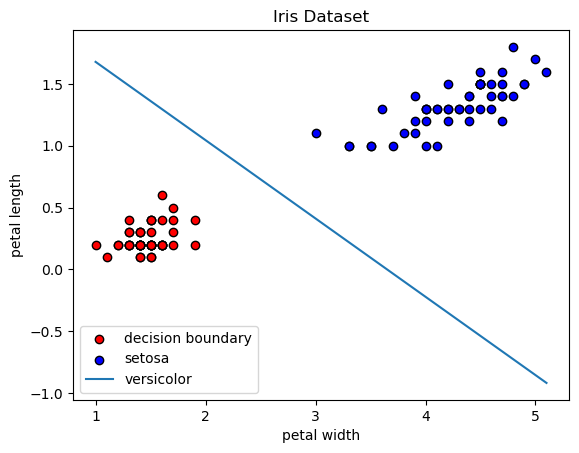

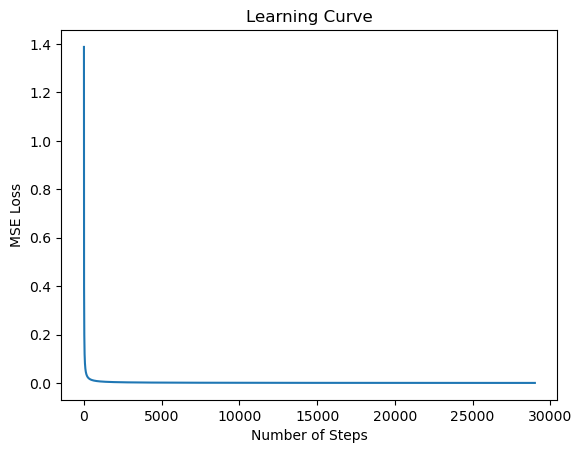

In [9]:
# TODO Task 5
X = iris.data[:, 2:4]  # Select petal length and petal width
y = iris.target

# Select only two classes for binary classification
# Assuming classes 0 and 1 are chosen
class_indices = np.where(y < 2)  # This will select classes 0 and 1
X = X[class_indices]

# Form: array of arrays [[1], [2], ...]
y = y[class_indices]

# Add intercept term to feature matrix
# Form: array of arrays [[1, 5.1, 1.6], ...]
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Initialize logistic regression parameters
# Form: array of arrays, like [[0,0,0]]
theta = np.ones((X.shape[1], 1))
alpha = 0.01 
y = y.reshape(-1, 1)


# Initialize the model
log_reg = LogisticRegression(X, y, theta, alpha)


# Train the model using gradient descent
losses = log_reg.run_gradient_descent() 

# Plot decision boundary
log_reg.decision_boundary('iris')

# Just for fun, plotting learning curve as well
log_reg.plot_MSE_loss(losses)

**Task 6**
Explore your method on the wine dataset, expanding from 2 dimensions into multiple dimensions.
 - Split the wine dataset into a training set and a test set (80/20 split). We recommend shuffling the data first.
 - Then, perform feature scaling (standardizing to mean = 0 and variance = 1) on both the training and test sets. Please write your own function to perform this standardization, rather than using a module from scikit-learn. Note that it is recommended to calculate the scaling parameters (mean and variance) from the training set, and then apply those same paramters to scale the test set, so that the test set does not influence the training in any way. 
 - **we are not expecting to get 100% accuracy on any of the feature combinations**, but an empirical lower bound for the accuracy is given. That is to say, your approach is probably right, as long as your performance on the test set is higher than the number.
 - Train your model on the wine training data with the following 4 [feature combinations] : percentage to beat during test
   * [fixed acidity, volatile acidity, residual sugar] : 85%
   * [density, pH, alcohol] : 75%
   * [fixed acidity, volatile acidity, chlorides] : 85%
   * [all 11 features]: 95%
   * note that the features list is: fixed acidity/volatile acidity/citric acid/residual sugar /chlorides/free sulfur dioxide/total sulfur dioxide/density/pH/sulphates/alcohol
 - Display the decision boundary plots (plot in 2d, so please just choose any 2 of your features as x- and y-). 
 - Display plots of the learning curve 
 - Report the model's final accuracy on the test set

In [10]:
#TODO - Task 6, apply your method to the wine dataset

# 1. Splitting the dataset, using sklearn library
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80/20 split), randomized
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [11]:
# Step 2: normalize the inputs
def standardize_features(train, test):
    # Store all means and std devs
    means = {}
    stds = {}

    # Iterate over each column in the training data except for the label
    for column in train.columns:
        if column != 'label' and column != 'wine_type':
            # Calculate the mean and standard deviation for the feature in the training set
            means[column] = train[column].mean()
            stds[column] = train[column].std()

            # Standardize the training data
            train[column] = (train[column] - means[column]) / stds[column]

            # Standardize the test data using the mean and std from the training set
            test[column] = (test[column] - means[column]) / stds[column]

    return train, test

# Apply the standardization function to your training and test sets
real_train, real_test = standardize_features(train_df.copy(), test_df.copy())

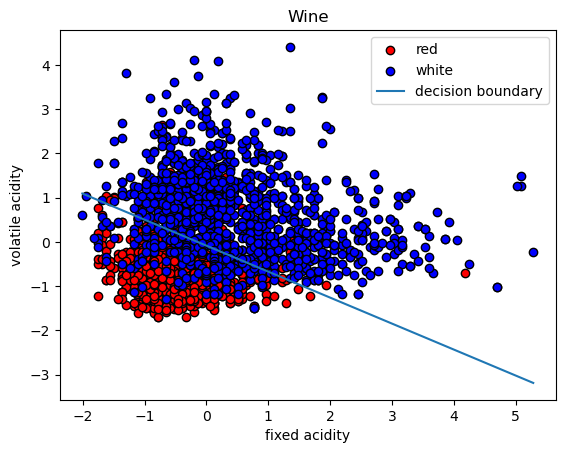

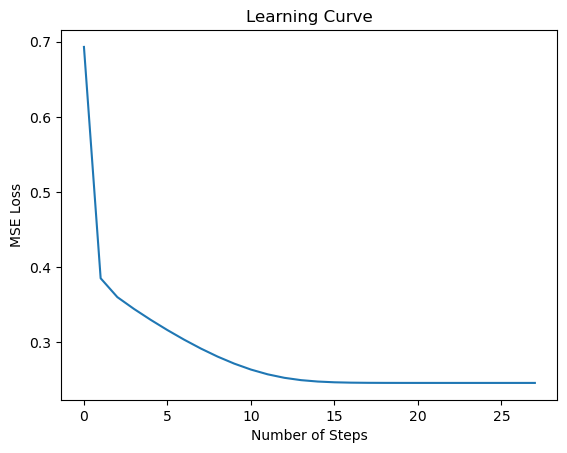

Yay! Passed! With accuracy 0.9015625


In [12]:
# ******** SET 1: [fixed acidity, volatile acidity, residual sugar] ********
# GOAL: beat 85% 


data_1 = real_train.iloc[:, [0, 1, 3]].to_numpy()

# Horizontally stack the ones and data_1_array
X = np.hstack([np.ones((data_1.shape[0], 1)), data_1])


target_1 = real_train.iloc[:, 11]

# Corresponding y: array of arrays
y = np.array([[element] for element in target_1])

theta = np.zeros((X.shape[1], 1))


# Initialize the model
logReg = LogisticRegression(X, y, theta, alpha)


# Train the model using gradient descent
losses = logReg.run_gradient_descent(threshold=0.1) 

# Plot decision boundary
logReg.decision_boundary("wine", "fixed acidity", "volatile acidity")

# Just for fun, plotting learning curve as well
logReg.plot_MSE_loss(losses)



# ******** SET 1 TESTING ********

data_1_test = real_test.iloc[:, [0, 1, 3]].to_numpy()
X_test = np.hstack([np.ones((data_1_test.shape[0], 1)), data_1_test])


target_1_test = real_test.iloc[:, 11]

y_test = np.array([[element] for element in target_1_test])

theta = np.ones((X_test.shape[1], 1))

result_0 = logReg.evaluate(X_test, y_test)

if(result_0 > 0.85):
    print("Yay! Passed! With accuracy", result_0)
else:
    print("No...did not pass. With accuracy", result_0)

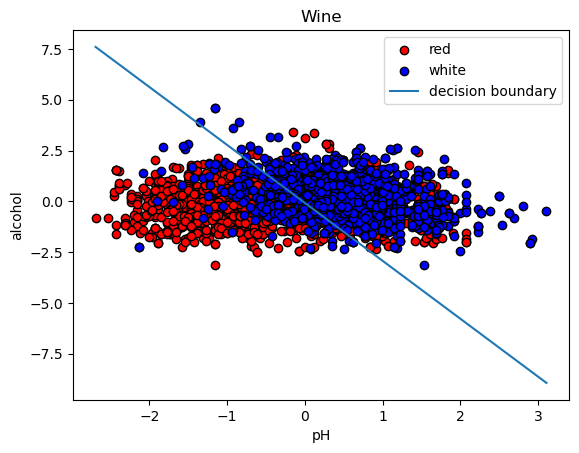

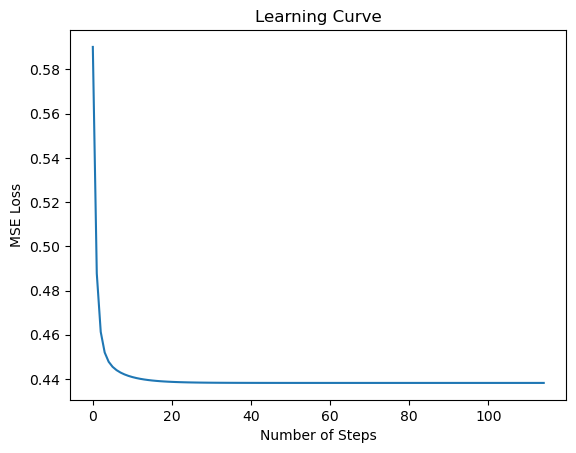

Yay! Passed! With accuracy 0.8203125


In [13]:
# ******** SET 2: [density, pH, alcohol] ********
# GOAL: beat 75% 


# Ha! switched the position so it's [pH, alcohol, density]
data_2 = real_train.iloc[:, [7, 8, 10]].to_numpy()

# Horizontally stack the ones
X = np.hstack([np.ones((data_2.shape[0], 1)), data_2])


target_2 = real_train.iloc[:, 11]

# Corresponding y: array of arrays
y = np.array([[element] for element in target_2])

theta = np.ones((X.shape[1], 1))


# Initialize the model
log_reg_2 = LogisticRegression(X, y, theta, alpha=0.001)


# Train the model using gradient descent
losses = log_reg_2.run_gradient_descent() 

# Plot decision boundary
log_reg_2.decision_boundary("wine", "pH", "alcohol")

# Just for fun, plotting learning curve as well
log_reg_2.plot_MSE_loss(losses)



# ******** SET 2 TESTING ********

data_2_test = real_test.iloc[:, [7, 8, 10]].to_numpy()
X_test_2 = np.hstack([np.ones((data_2_test.shape[0], 1)), data_2_test])


target_2_test = real_test.iloc[:, 11]

y_test_2 = np.array([[element] for element in target_2_test])

theta = np.zeros((X_test_2.shape[1], 1))

result_2 = log_reg_2.evaluate(X_test_2, y_test_2)
if(result_2 > 0.75):
    print("Yay! Passed! With accuracy", result_2)
else:
    print("No...did not pass. With accuracy", result_2)

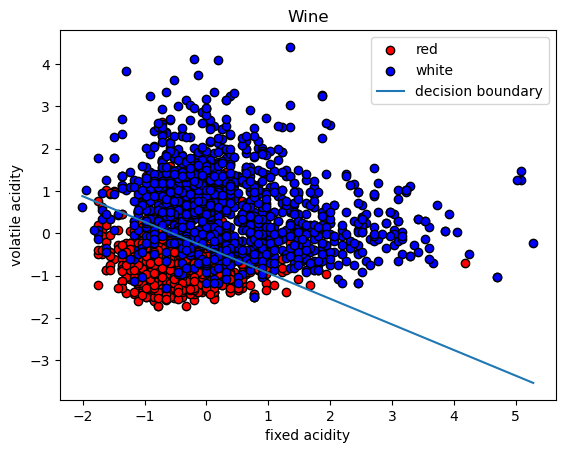

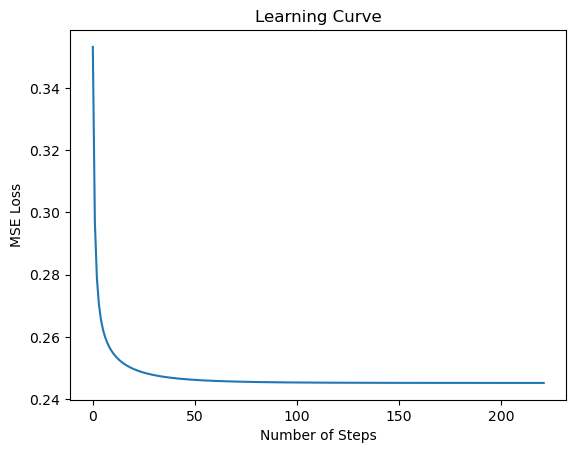

Yay! Passed! With accuracy 0.9140625


In [14]:
# ******** SET 3: [fixed acidity, volatile acidity, chlorides] ********
# GOAL: beat 85% 


# Ha! switched the position so it's []
data_3 = real_train.iloc[:, [0, 1, 4]].to_numpy()

# Horizontally stack the ones
X_3 = np.hstack([np.ones((data_3.shape[0], 1)), data_3])


target_3 = real_train.iloc[:, 11]

# Corresponding y: array of arrays
y_3 = np.array([[element] for element in target_3])

theta_3 = np.ones((X_3.shape[1], 1))


# Initialize the model
log_reg_3 = LogisticRegression(X_3, y_3, theta_3, alpha=0.001)


# Train the model using gradient descent
losses = log_reg_3.run_gradient_descent()

# Plot decision boundary
log_reg_3.decision_boundary("wine", "fixed acidity", "volatile acidity")

# Just for fun, plotting learning curve as well
log_reg_3.plot_MSE_loss(losses)



# ******** SET 3 TESTING ********

data_3_test = real_test.iloc[:, [0, 1, 4]].to_numpy()
X_test_3 = np.hstack([np.ones((data_3_test.shape[0], 1)), data_3_test])


target_3_test = real_test.iloc[:, 11]

y_test_3 = np.array([[element] for element in target_3_test])

theta = np.zeros((X_test_3.shape[1], 1))

result = log_reg_3.evaluate(X_test_3, y_test_3)

if(result > 0.85):
    print("Yay! Passed! With accuracy", result)
else:
    print("No...did not pass. With accuracy", result)

In [15]:
# In response to 3.2: training accuracy

# Load the Iris dataset
iris = datasets.load_iris()

# Select petal length and petal width features
X = iris.data[:, 2:4]  # columns for petal length and petal width

# Select only two classes for binary classification (for example, class 0 and class 1)
y = iris.target
class_indices = np.where(y < 2)  # This will select classes 0 and 1
X = X[class_indices]
y = y[class_indices]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% of data for testing

# Add intercept term to feature matrices for both training and testing sets
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

# Initialize logistic regression parameters
theta = np.ones((X_train.shape[1], 1))
alpha = 0.01
y_train = y_train.reshape(-1, 1)  # Reshape for compatibility with the logistic regression implementation

# Assuming the LogisticRegression class and its methods are defined as in your previous code snippets,
# you can now initialize the model with the training data
log_reg = LogisticRegression(X_train, y_train, theta, alpha)

# Train the model using gradient descent
losses = log_reg.run_gradient_descent()


# To evaluate the model, use the test set
# Make sure to implement an 'evaluate' method in your LogisticRegression class if it's not already there
accuracy = log_reg.evaluate(X_test, y_test.reshape(-1, 1))
print(f"Model accuracy on test set: {accuracy * 100:.2f}%")

Model accuracy on test set: 100.00%


**Question 3:**

 3.1. Describe the convergence condition you selected.

<font color='blue'>
Response: I consider the model converges when the magnitude of the gradient is less than 0.01 (0.1 for set 2), because if the gradient barely changes, it means the model converges to its local minimum.
</font>

 3.2. What was the model's training accuracy on the Iris dataset (for the two classes you selected)?

<font color='blue'>
Response: From the code I wrote above (I did the proper training and testing sets), the model can 100% distinguish class 0 from class 1. Also, from the plot of iris dataset above, we can see that is kinda true - the line clearly divides the two clusters with no ambiguity.
</font>

 3.3. What was the model's training and test accuracy on the wine quality dataset? Which one gives the best performance? Does that live up to your expectation and why?

<font color='blue'>
Response: See the prints on accuracy above:
    
For Set 1, I trained [fixed acidity, volatile acidity, residual sugar] and got a test accuracy of **90.16%**.

    
For Set 2, I trained [density, pH, alcohol] and got a test accuracy of **82.03%**.
    

For Set 3, I trained [fixed acidity, volatile acidity, chlorides] and got a test accuracy of **91.41%**.
    
Set 3 has the best performance, and Set 1 is also very good. This is expected, because if you plot any two dimensions in set 2, you can see the majority of data mingle with each other. Hence, it is hard for the model to tell one class from another.
</font>

---
## Part 2: Locally Weighted Linear Regression 

In this second part, you will write a locally weighted linear regression class, and apply it to a synthetic dataset. This dataset is included as a text file on Brightspace, and is called 'LWR_samples.npy'. Each line of the text file represents one training example in the format $x^{(i)},y^{(i)}$ (i.e. the delimiter is a comma). 

#### **Task 7**
- Load the synthetic data, from the file `assignment2_LWR_samples.npy`
- Interpret the $(x^{(i)},y^{(i)})$ pairs, and plot them with a scatter plot.
- Implement a LocallyWeightedLR class (example framework below). To make a prediction at input $x$, weight each training example according to the function we discussed in lecture: 
$$ w^{(i)} = \exp\big(-\frac{(x^{(i)} - x)^2}{2\tau^2} \big), $$
where $\tau$ is a bandwidth parameter that you will experiment with.
- To compute the local linear regression parameters ($\theta$) at each query point, use the closed-form solution. The formula is:
$$ \theta = (X^TWX)^{-1} X^TWy, $$
where $X$ is the design matrix formed by your training inputs (make sure to include the intercept term), $W$ is a diagonal matrix whose $i^{th}$ diagonal entry corresponds to the weight of the $i^{th}$ training example (which depend on the point at which you are making a prediction), and $y$ is a column vector containing the target labels of the training examples.

- Run this regression model to make predictions at the specific input points x = 4, x = 0.5, and x = -3. Use $\tau$ = 0.5. Report the values of the local regression parameters $\theta$ obtained for each of these 3 points.
- Now, generate an array of predictions corresponding to equally spaced input points (in the range of [-4.5, 4.5] in steps of 0.05), again using $\tau$ = 0.5. Generate a plot showing the predictions from Locally Weighted Linear Regression on each of these input points, superimposed on (and colored differently from) the training data.
- Repeat the previous step, now using bandwidth parameters $\tau = 0.1$ and $\tau = 1.5$. Plot the results, again superimposed on the training data (and in a different color).

In [16]:
#TODO - Implement Locally-Weighted Linear Regression class

class LocallyWeightedLR():
    
    def __init__(self, X, y, tau):
        self.X = X
        self.y = y
        self.tau = tau 
        
    # use bandwidth variable tau to compute weights for each training point.  
    # return a diagonal matrix with w_i on the diagonal (for vectorization)
    # note that the values of w_i depend upon the value of the input query point x.
    def compute_weights(self, x):
        # Reshape x to 2D array
        if len(x.shape) == 1:
            x = x[:, np.newaxis]
            
        # plug in the formula
        diff = self.X[:,1:] - x
        norms = np.sum(diff ** 2, axis = 1)
        w = np.exp(-norms / (2 * self.tau ** 2))
        return np.diag(w)
    
    # analytical solution for the local linear regression parameters at the input query point x.
    # this should involve calling the above method compute_weights.
    def compute_theta(self, x):
        # Compute weights for the query point
        W = self.compute_weights(x)
        
        # Calculate theta using the normal equation with weights
        XTWX = self.X.T @ W @ self.X
        XTWy = self.X.T @ W @ self.y

        theta = np.linalg.inv(XTWX) @ XTWy
        return theta
    
    def predict(self, x):
        W = self.compute_weights(x)
        theta = self.compute_theta(x)
        
        q_pt = np.hstack(([1], x))
        prediction = q_pt @ theta
        
        return theta, prediction
    

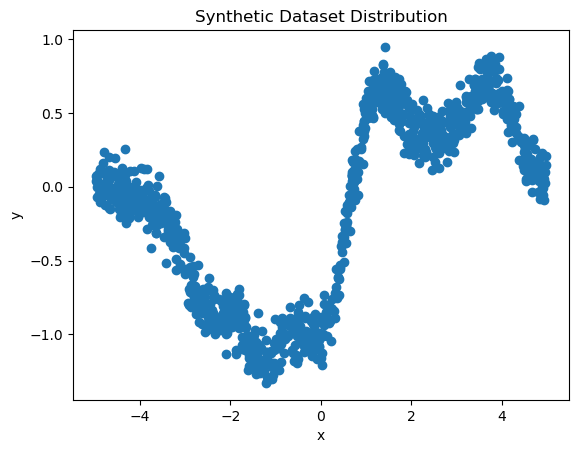

In [17]:
#TODO - Read in the artificial dataset, plot it, and run the code according to the above instructions.
df = np.load("assignment2-LWR_samples.npy")

plt.title("Synthetic Dataset Distribution")
plt.scatter(x=df[:,0], y=df[:,1])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [18]:
X_data = df[:, 0]

# Convert X_1 to a 2D array with one column
X = X_data.reshape(-1, 1)

# Add the intercept term
X = np.hstack((np.ones((X.shape[0], 1)), X))

y = df[:, 1]

tau = 0.5
model = LocallyWeightedLR(X, y, tau)

theta, res = model.predict(np.array([4]))
print("*** RESULTS ***")
print("x = 4, tau = 0.5: theta: ", theta, "prediction: ", res)

theta, res = model.predict(np.array([0.5]))
print("x = 0.5, tau = 0.5: theta: ", theta, "prediction: ", res)

theta, res = model.predict(np.array([-3]))
print("x = -3, tau = 0.5: theta: ", theta, "prediction: ", res)

*** RESULTS ***
x = 4, tau = 0.5: theta:  [ 1.78634424 -0.32029129] prediction:  0.5051790815889357
x = 0.5, tau = 0.5: theta:  [-0.84244208  1.11142885] prediction:  -0.2867276522997303
x = -3, tau = 0.5: theta:  [-2.08390745 -0.52159246] prediction:  -0.5191300767604841


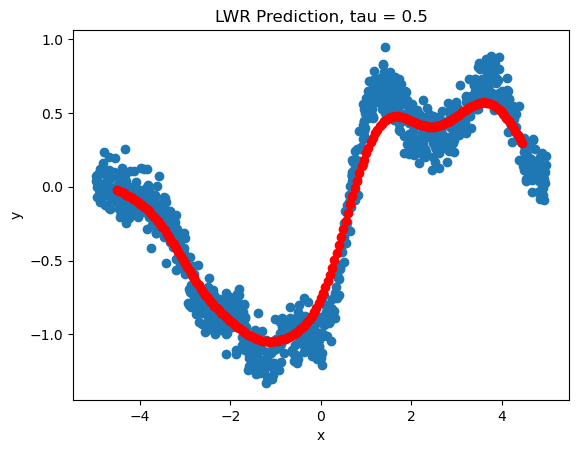

In [19]:
# Generate an array of input points
input_points = np.arange(-4.5, 4.5, 0.05)

# Plot the figure
plt.scatter(x=df[:,0], y=df[:,1])
plt.title("LWR Prediction, tau = 0.5")

# For each point, generate its prediction
for point in input_points:
    a, predict = model.predict(x = point)
    plt.scatter(point, predict, color='red')

plt.xlabel("x")
plt.ylabel("y")
plt.show()

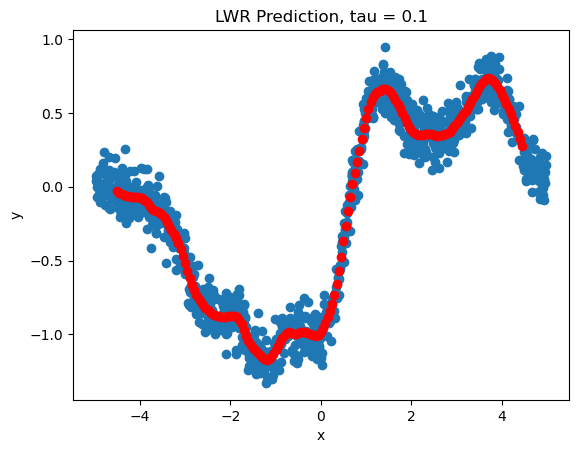

In [20]:
# tau = 0.1

# Create an instance of the LocallyWeightedLR class
model_2 = LocallyWeightedLR(X, y, tau = 0.1)

input_points = np.arange(-4.5, 4.5, 0.05)


# Plot the figure
plt.scatter(x=df[:,0], y=df[:,1])
plt.title("LWR Prediction, tau = 0.1")

# For each point, generate its prediction
for point in input_points:
    b, predict_2 = model_2.predict(x = point)
    plt.scatter(point, predict_2, color='red')

plt.xlabel("x")
plt.ylabel("y")
plt.show()

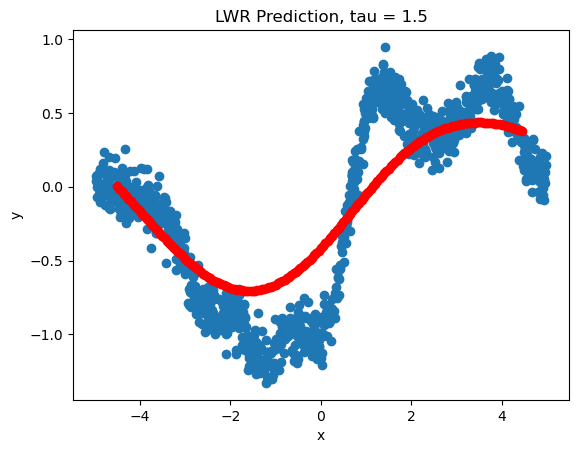

In [21]:
# tau = 1.5

# Create an instance of the LocallyWeightedLR class
model_3 = LocallyWeightedLR(X, y, tau = 1.5)

input_points = np.arange(-4.5, 4.5, 0.05)


# Plot the figure
plt.scatter(x=df[:,0], y=df[:,1])
plt.title("LWR Prediction, tau = 1.5")

# For each point, generate its prediction
for point in input_points:
    b, predict_3 = model_3.predict(x = point)
    plt.scatter(point, predict_3, color='red')

plt.xlabel("x")
plt.ylabel("y")
plt.show()

**Question 4**: 
 - Do the local linear regression parameters $\theta$ returned for the 3 input points (4, 0.5, -3) agree with what you expect, based on the training data in the neighborhood of those points? Why or why not?
 
<font color='blue'>
Response: Yes, it does. Based on the plot (with nothing superimposed on), if you look at x = 4, locally it is indeed going downward with an intercept greater than 1, so [ 1.78634424 -0.32029129] is a good estimate. Similarly, for x = 0.5, It is going upward, so we need $\theta_1$ to be positive, hence [-0.84244208  1.11142885] is good too. Finally, [-2.08390745 -0.52159246] does not seem bad - at x = -3 it is going downward.
</font>


**Question 5:**  
 - Based on your observations, describe the effect of increasing and decreasing $\tau$, in the context of over/underfitting.
 
<font color='blue'>
Response: Since the data plot itself is curvy, it is good to use $\tau$ = 0.1 seems to be a good fit. When $\tau$ is too small, it is underfitting because the vinicinity points contributes too little to the line-fit. On the contrary, if $\tau$ is too big, it takes in too much data points to contribute to the fit, so the minute details happening locally cannot be effective captured - it is overfitting.
</font>

---

## Part 3: Advanced Task --- Epanechnikov kernel
optinal for 4262 students, but **REQUIRED for 5262 students**

Besides Gaussian kernel, there are other kernels that can be used in locally weighted linear regression. One of the most popular kernel is the Epanechnikov kernel,which is defined as:
$$
w^{(i)} = 
\begin{cases}
\frac{3}{4}(1 - \frac{(x^{(i)} - x)^2}{\tau^2}) & \text{, if } |x^{(i)} - x| < \tau \\
0 & \text{, else }
\end{cases}
$$

**Question 6:**
- When does $w^{(i)}$ reaches its maximum value? In other word, what is the value of $x^{(i)}$? What is that value?
- Please derive it from the definition of the kernel.
- Hint: consider the kernel function as a function of $x^{(i)}$, and it is parabolic.

Response:

**Question 7:**
- When does $w^{(i)}$ reaches its minimum value?

Response:

**Question 8:**
- Why Epanechnikov kernel does not work on sparse data or out-of-domain data?
- i.e., for some query point $x$, if there is no training data in the neighborhood of $x$, what will happen to the kernel function?
- Please explain it by **deriving** either $\theta$ with the closed-form solution, or the matrix form of gradient.
- Hint: What is the weighting matrix $W$ in this case?

Response:


---
## Part 4: Submission 

Please upload a clean version of your work to Brightspace by the deadline.

Below, please acknowledge your collaborators as well as any resources/references (beyond guides to Python syntax) that you have used in this assignment: